In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.colors as mcolors

In [ ]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

def density_Gaussian(mean_vec,covariance_mat,x_set):
    """ Return the density of multivariate Gaussian distribution
        Inputs: 
            mean_vec is a 1D array (like array([,,,]))
            covariance_mat is a 2D array (like array([[,],[,]]))
            x_set is a 2D array, each row is a sample
        Output:
            a 1D array, probability density evaluated at the samples in x_set.
    """
    d = x_set.shape[1]  
    inv_Sigma = np.linalg.inv(covariance_mat)
    det_Sigma = np.linalg.det(covariance_mat)
    density = []
    for x in x_set:
        x_minus_mu = x - mean_vec
        exponent = - 0.5*np.dot(np.dot(x_minus_mu,inv_Sigma),x_minus_mu.T)
        prob = 1/(((2*np.pi) ** (d/2))*np.sqrt(det_Sigma))*np.exp(exponent)
        density.append(prob)
    density_array = np.array(density)  
    
    return density_array 

def get_data_in_file(filename):
    """ 
    Read the height/weight data and the labels from the given file as arrays 
    """
    with open(filename, 'r') as f:
        data = []
        # read the data line by line
        for line in f: 
            data.append([int(x) for x in line.split()]) 
            
    # store the height/weight data in x and the labels in y        
    data_array = np.array(data)     
    y = data_array[:,0]   # labels
    x = data_array[:,1:3]   # height/weight data
    
    return (x, y)




In [ ]:
def discrimAnalysis(x, y):
    """
    Estimate the parameters in LDA/QDA and visualize the LDA/QDA models
    
    Inputs
    ------
    x: a N-by-2 2D array contains the height/weight data of the N samples
    
    y: a N-by-1 1D array contains the labels of the N samples 
    
    Outputs
    -----
    A tuple of five elments: mu_male,mu_female,cov,cov_male,cov_female
    in which mu_male, mu_female are mean vectors (as 1D arrays)
             cov, cov_male, cov_female are covariance matrices (as 2D arrays)
    Besides producing the five outputs, you need also to plot 1 figure for LDA 
    and 1 figure for QDA in this function         
    """
    ### TODO: Write your code here
    tot_num = len(y)

    # getting mu_male & mu_female:
    num_male = np.sum(y == 1)
    tot_male_height = 0
    tot_male_weight = 0
    
    num_female = np.sum(y == 2)
    tot_female_height = 0
    tot_female_weight = 0
    
    for i in range(0, tot_num):
      if y[i] == 1:
        tot_male_height += x[i][0]
        tot_male_weight += x[i][1]
      else:
        tot_female_height += x[i][0]
        tot_female_weight += x[i][1]
    
    mu_male_height = tot_male_height/num_male
    mu_male_weight = tot_male_weight/num_male

    mu_female_height = tot_female_height/num_female
    mu_female_weight = tot_female_weight/num_female

    mu_male = [mu_male_height, mu_male_weight]
    mu_female = [mu_female_height, mu_female_weight]
    
    # getting mu
    mu_height = (tot_male_height + tot_female_height) / tot_num
    mu_weight = (tot_male_weight + tot_female_weight) / tot_num
    mu = [mu_height, mu_weight]
    
    # getting cov_male & cov_female:
    cov_m_ii = 0
    cov_m_ij = 0
    cov_m_jj = 0
    cov_f_ii = 0
    cov_f_ij = 0
    cov_f_jj = 0

    for i in range(0, tot_num):
      if y[i] == 1:
        cov_m_ii += (x[i][0] - mu_male[0]) ** 2
        cov_m_ij += (x[i][0] - mu_male[0]) * (x[i][1] - mu_male[1])
        cov_m_jj += (x[i][1] - mu_male[1]) ** 2
      else:
        cov_f_ii += (x[i][0] - mu_female[0]) ** 2
        cov_f_ij += (x[i][0] - mu_female[0]) * (x[i][1] - mu_female[1])
        cov_f_jj += (x[i][1] - mu_female[1]) ** 2

    cov_male_ii = cov_m_ii/num_male
    cov_male_ij = cov_m_ij/num_male
    cov_male_jj = cov_m_jj/num_male
    cov_female_ii = cov_f_ii/num_female
    cov_female_ij = cov_f_ij/num_female
    cov_female_jj = cov_f_jj/num_female
    
    cov_male = [[cov_male_ii, cov_male_ij], [cov_male_ij, cov_male_jj]]
    cov_female = [[cov_female_ii, cov_female_ij], [cov_female_ij, cov_female_jj]]
    
    # getting cov
    cov = np.zeros([2,2])
    diff = []
    for i in range(0, tot_num):
      diff = x[i] - mu
      diff_o = diff.reshape(1,2)
      diff_t = diff.reshape(2,1)
      cov += np.dot(diff_t, diff_o)

    cov = cov / tot_num

    # Visualization
    male_height = []
    male_weight = []
    female_height = []
    female_weight = []
    for i in range(0, tot_num):
      if y[i] == 1:
        male_height.append(x[i][0])
        male_weight.append(x[i][1])
      else:
        female_height.append(x[i][0])
        female_weight.append(x[i][1])
    
    x_grid = np.linspace(50, 80, 100)   
    y_grid = np.linspace(80, 280, 100) 
    X, Y = np.meshgrid(x_grid, y_grid)

    LDA_m = []
    QDA_m = []
    LDA_f = []
    QDA_f = []
    x_val = X[0].reshape(100, 1)
    for i in range(0, 100):
      y_val = Y[i].reshape(100, 1)
      samples = np.concatenate((x_val, y_val), 1)
      
      LDA_m.append(density_Gaussian(mu_male,cov,samples))
      QDA_m.append(density_Gaussian(mu_male,cov_male,samples))

      LDA_f.append(density_Gaussian(mu_female,cov,samples))
      QDA_f.append(density_Gaussian(mu_female,cov_female,samples))    
    
    # plotting LDA for male & female
    x_range = [50, 80]
    y_range = [80, 280]
    plt.scatter(male_height, male_weight, color = 'b')
    plt.scatter(female_height, female_weight, color = 'r')
    plt.contour(X,Y,LDA_m,colors='b')
    plt.contour(X,Y,LDA_f,colors='r')
    LDA_boundary = np.asarray(LDA_m) - np.asarray(LDA_f)
    plt.contour(X,Y,LDA_boundary,0,color='c1')
    plt.title('LDA')
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.show()

    # plotting QDA for male & female
    x_range = [50, 80]
    y_range = [80, 280]
    plt.scatter(male_height, male_weight, color = 'b')
    plt.scatter(female_height, female_weight, color = 'r')
    plt.contour(X,Y,QDA_m,colors='b')
    plt.contour(X,Y,QDA_f,colors='r')
    QDA_boundary = np.asarray(QDA_m) - np.asarray(QDA_f)
    plt.contour(X,Y,QDA_boundary,0,color='c1')
    plt.title('QDA')
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.show()

    return (mu_male, mu_female, cov, cov_male, cov_female)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:132: UserWarning: The following kwargs were not used by contour: 'color'


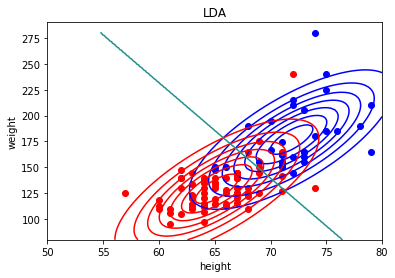

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:146: UserWarning: The following kwargs were not used by contour: 'color'


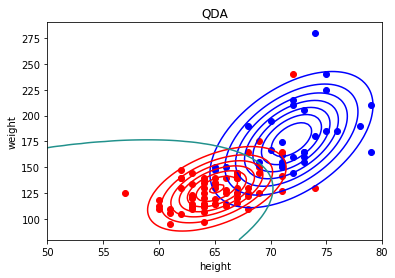

In [ ]:
# load training data and testing data
    x_train, y_train = get_data_in_file('trainHeightWeight.txt')
    x_test, y_test = get_data_in_file('testHeightWeight.txt')
    
    # parameter estimation and visualization in LDA/QDA
    mu_male,mu_female,cov,cov_male,cov_female = discrimAnalysis(x_train,y_train)

In [ ]:
def misRate(mu_male,mu_female,cov,cov_male,cov_female,x,y):
    """
    Use LDA/QDA on the testing set and compute the misclassification rate
    
    Inputs
    ------
    mu_male,mu_female,cov,cov_male,mu_female: parameters from discrimAnalysis
    
    x: a N-by-2 2D array contains the height/weight data of the N samples  
    
    y: a N-by-1 1D array contains the labels of the N samples 
    
    Outputs
    -----
    A tuple of two elements: (mis rate in LDA, mis rate in QDA )
    """
    ### TODO: Write your code here
    tot_num = len(y)
    # calculating correcr LDA for male & female
    LDA_m = np.dot(np.asarray(mu_male).T, np.dot(np.linalg.inv(cov), x.T)) - 1/2*np.dot(np.asarray(mu_male).T, np.dot(np.linalg.inv(cov), np.asarray(mu_male)))
    LDA_f = np.dot(np.asarray(mu_female).T, np.dot(np.linalg.inv(cov), x.T)) - 1/2*np.dot(np.asarray(mu_female).T, np.dot(np.linalg.inv(cov), np.asarray(mu_female)))
    correct_lda = 0
    for i in range(0, tot_num):
      if (LDA_m[i] >= LDA_f[i] and y[i] == 1):
        correct_lda += 1
      elif (LDA_m[i] <= LDA_f[i] and y[i] == 2):
        correct_lda += 1

    # calculating correcr QDA for male & female
    QDA_m = []
    QDA_f = []
    for i in range(0, x.shape[0]):
      QDA_m.append(- 1/2*np.log(np.linalg.det(cov_male)) - 1/2*np.dot(x[i], np.dot(np.linalg.inv(cov_male), x[i].T)) + np.dot(np.asarray(mu_male).T, np.dot(np.linalg.inv(cov_male), x[i].T)) - 1/2*np.dot(np.asarray(mu_male).T, np.dot(np.linalg.inv(cov_male), mu_male)))
      QDA_f.append( - 1/2*np.log(np.linalg.det(cov_female)) - 1/2*np.dot(x[i], np.dot(np.linalg.inv(cov_female), x[i].T)) + np.dot(np.asarray(mu_female).T, np.dot(np.linalg.inv(cov_female), x[i].T)) - 1/2*np.dot(np.asarray(mu_female).T, np.dot(np.linalg.inv(cov_female), mu_female)))
      
    QDA_m = np.asarray(QDA_m)
    QDA_f = np.asarray(QDA_f)
    correct_qda = 0
    for i in range(0, tot_num):
      if (QDA_m[i] >= QDA_f[i] and y[i] == 1):
        correct_qda = correct_qda + 1
      elif (QDA_m[i] <= QDA_f[i] and y[i] == 2):
        correct_qda = correct_qda + 1
    # calculating miss LDA:
    mis_lda = 1-correct_lda/tot_num
    
    # calculating miss QDA:
    mis_qda = 1-correct_qda/tot_num
    print(mis_lda)
    print(mis_qda)
    return (mis_lda, mis_qda)

In [ ]:
# misclassification rate computation
    mis_LDA,mis_QDA = misRate(mu_male,mu_female,cov,cov_male,cov_female,x_test,y_test)


0.11818181818181817
0.10909090909090913
